# 多项式回归
polynomialregression<br>
实际中线性关系是一个很强的假设 所以就有了多项式回归<br>
然后根据多项式回归 我们会讨论模型泛化问题<br>
![poly1](img/poly1.png)
### 多添加了一些特征, 而这些特征是原来特征的多项式


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed = 666
x = np.random.uniform(-3, 3, size= 100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1, size=100)

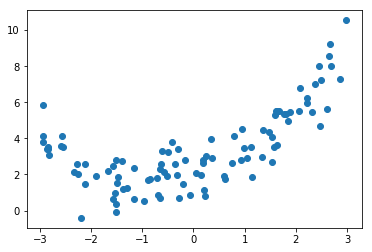

In [4]:
plt.scatter(X[:, 0], y)

## 线性拟合的结果

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

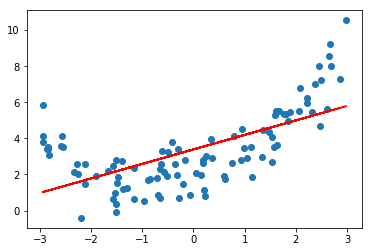

In [7]:
plt.scatter(X[:, 0], y)
plt.plot(x, y_predict, color="r")

## 解决方案 新加一个特征

In [8]:
X2 = np.hstack([X, (X**2)])

In [9]:
X2.shape

(100, 2)

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_predict2 = lin_reg2.predict(X2)

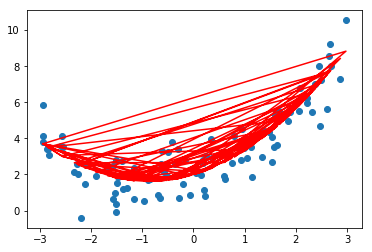

In [12]:
plt.scatter(X[:, 0], y)
plt.plot(x, y_predict2, color="r")

In [13]:
# 可以看到前面的图是乱的 因为我们的x 是没有顺序的

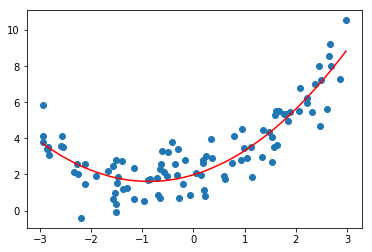

In [14]:
plt.scatter(X[:, 0], y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")

In [15]:
lin_reg2.intercept_

1.9820435622675154

In [16]:
# 第一个系数是x的系数  第二个是x^2的系数
# 参考前面生成X2的方法
lin_reg2.coef_

array([0.84751856, 0.48732947])

# sklearn中的多项式回归和pipeline

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# 添加最多几次幂
poly = PolynomialFeatures(degree=2)

In [21]:
poly.fit(X)
X2 = poly.transform(X)

In [26]:
X2.shape

(100, 3)

In [27]:
# 1, x, x^2
X2[:5]

array([[ 1.        ,  1.33785643,  1.78985982],
       [ 1.        ,  2.65794438,  7.06466833],
       [ 1.        , -2.8429541 ,  8.08238799],
       [ 1.        , -0.85721629,  0.73481976],
       [ 1.        , -2.19688221,  4.82629143]])

In [28]:
X[:5]

array([[ 1.33785643],
       [ 2.65794438],
       [-2.8429541 ],
       [-0.85721629],
       [-2.19688221]])

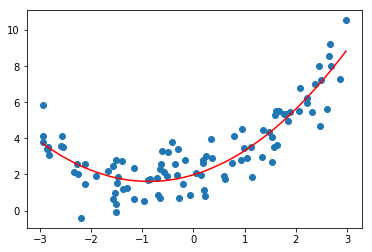

In [32]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(X[:, 0], y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")

In [33]:
lin_reg2.coef_

array([0.        , 0.84751856, 0.48732947])

In [34]:
lin_reg2.intercept_

1.9820435622675168

# polynomialfeatures 是指数级上涨的
![poly2](img/poly2.png)

# pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [39]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [41]:
y_predict = poly_reg.predict(X)

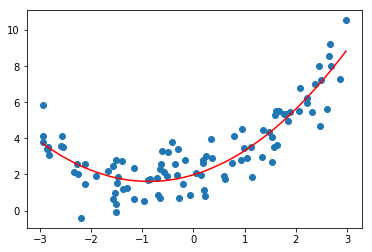

In [42]:
plt.scatter(X[:, 0], y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")

In [43]:
poly_reg.

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])>